In [23]:
import numpy as np
import pandas as pd

In [198]:
data = [
    [0, 1, 1],
    [0, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [1, 1, 0],
    [2, 1, 0],
    [3, 1, 0],
    [2, 2, 0],
    [3, 4, 0],
]
data = pd.DataFrame(data)

In [199]:
data

,0,1,2
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,0
5,1,1,0
6,2,1,0
7,3,1,0
8,2,2,0
9,3,4,0


In [200]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [201]:
X[2]=np.ones(X.shape[0])

In [202]:
X

,0,1,2
0,0,1,1.0
1,0,0,1.0
2,0,1,1.0
3,0,0,1.0
4,1,0,1.0
5,1,1,1.0
6,2,1,1.0
7,3,1,1.0
8,2,2,1.0
9,3,4,1.0


In [203]:
class Perceptron:
    def __init__(self, lr=0.1):
        self.lr = lr
    def stepfn(self, x):
        return (x>0).astype(int)
    def predict(self, x):
        return self.stepfn(np.dot(x, self.weights))
    def fit(self, X, y, epochs=100):
        self.weights = np.zeros(X.shape[1])
        for _ in range(epochs):
            for i in range(X.shape[0]):
                y_hat = self.predict(X.iloc[i, :])
                error = y[i]-y_hat
                self.weights += self.lr * error * X.iloc[i, :]
    def get_weights(self):
        return self.weights

In [204]:
model = Perceptron()
model.fit(X, y)

In [205]:
model.predict(X)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [206]:
weights, bias = model.get_weights()[:2], model.get_weights()[2]

In [207]:
weights, bias

(0   -0.4
 1   -0.1
 Name: 0, dtype: float64,
 0.2)

In [208]:
## y = mx + c
## ax + by + c = 0
## y = -a/bx -c/b
def calculate(x):
    return -weights[0]/weights[1]*x -bias/weights[1]

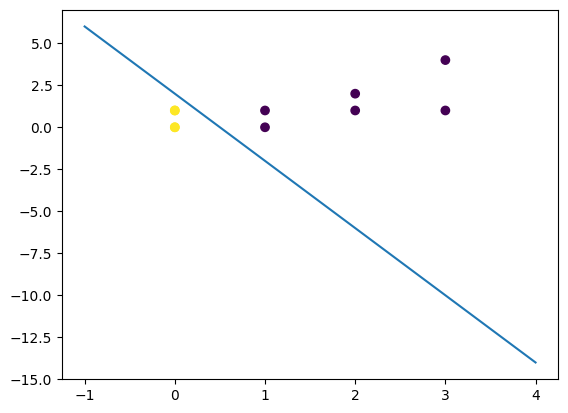

In [209]:
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1], c=y)
points = np.linspace(min(X[0])-1, max(X[0])+1, 1000)
plt.plot(points, calculate(points))